## Python Implementation

In [1]:
#Import neccesary libraries
import pandas as pd
import numpy as np

#for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets read the Data 
df=pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/breast%20cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Summazrize the data
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(columns=['Unnamed: 32','id'],inplace =True)

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Lets Check our Label
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

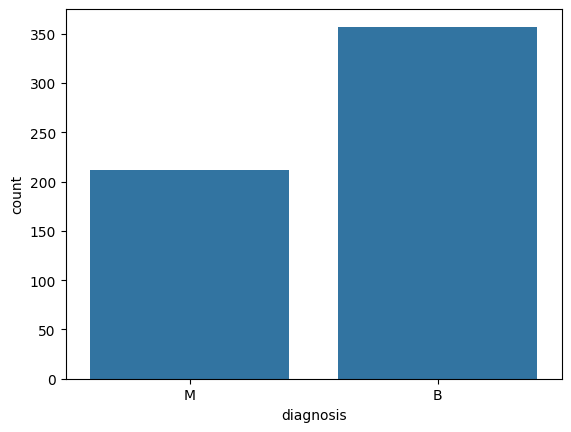

In [7]:
#Lets  plot the  diagnosis in countplot

sns.countplot(x='diagnosis',data=df)
plt.show()

In [8]:
df['diagnosis']=df['diagnosis'].replace({'M':0,'B':1})

In [9]:
#Now This Time Select Best Feature out of 31  We use new tecniques lets see SelectKBest

In [10]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [11]:
from sklearn.feature_selection import SelectKBest,f_classif

In [12]:
select_feature=SelectKBest(score_func=f_classif,k=14)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(14,'Score'))

                 Feature       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392


In [13]:
new_df=df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se']]

In [14]:
new_df

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
scaler=StandardScaler()

In [17]:
x_scaler=scaler.fit_transform(new_df)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=94255)

In [19]:
#Lets make one function and use every time for checking test score and train score 

In [20]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('=============== Train Test===============')
        print(f"Accuracy Score :{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("===================Train Test============")
        print(f"Accuracy Score :{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print("Classification Report ",classification_report(y_test,pred,digits=2))

In [21]:
knn=KNeighborsClassifier()

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

=============== Train Test===============
Accuracy Score :95.31%


In [24]:
#Check For test Score

In [25]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

===================Train Test============
Accuracy Score :93.71%
Classification Report                precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



## Cross Validation
Cross Validation is a technique . Suppose you train a model on a given dataset. Using any specific algorithm . you tried to find the accuracy of the trained model using the same training data and found the accuracy of the trained model using the same training data and found the accuracy to be 95 % or maybe 100% . what does this mean ? Is your model ready for prediction ? The answer is no . Why? Because Your Model has trained itself on the given data . i.e it knows the data it has generalised over a new set of data , its most likely to give you very bad accuracy, beacause it has never seen the data before and thus it falls to generalizes well over it . This is the problem of overfitting . to tackle such problem , cross_validation comes into a picture .

Cross Validation is a resampling technique with a basic idea of dividing the training dataset into two parts. i.e train and test on one part(train) your try to train the model and on the second part (test) i.e the data which is unseen for the model , you make the predictionand check how well your model works on it. if the model works with good accuracy your test data it means that the model has not overfitted the training data and can be trusted with the prediction, wheareas if it performs with bad accuracy our modelis not to be trusted and we need to tweak our algorithms.



## Defination - 
There are some data points so these Red color also present in the test data . so that time there is a possibility your model is overfitted beacuse model has already seen here. this red data and some data exist in is test set . possibility you get 95% ,93% sometime 100% also, So that time how can we avoind such kind of situation,

## Q- How can we build Generalised Model ?

Generalised Model - Generalised Model means it should change be in a position generalise the data . Means to avoid overfiting and overcoming of this overfitting and building a model that is generalised model which means model is not overfitted neither underfitted.

## Q - How to tackle such situation ?

1-Hold Out Method - Hold Out method is nothing is a train test split
2 - K-Fold - Cross_ Validation - It is better then train test split

## K-Fold Cross Validation - So the problem with a hold out method if sample are same in both train test your model will over fit ...

How To avoid this kind of a situation ?

So thats were k fold cross validation comes into a picture .. Lets say whenever i say cross validation = 5 , we have to tell how many iteration and folds K means --> How many fold there is 5 Fold.

How its Work ?

This dataset trained 5 times . and within iteration 1 in that this whole dataset .it is going to split in 5 pieces / 5 sets (5 iteration/5split) it will divide in equal parts suppose there is a total 100% means 80% of the data kept for model training and 20 % will be use for testing.

Similarly 2nd iteration will take second part of the iteration for testing and left 5 part is use for training . similary its happen to all iteration. it depend on how much you give cross validation .

--> It means every iteration our testing data is going to be different and our training data is also changing partially.

Then after testing we are going to find accuracy of each training and test data set and we claculate the mean of all set of iteration.

Q- Why we are not using this every time ?

We will have 1 training set and 1 testing set . in order to train this . let suppose its taking 5 hours (litrelly it takes) in order to train the huge amount of data . it takes training time it need to identify all the patterns it has to study . if there are more numbers of feature we are adding so much data to it . it takes more time.

in this k-fold cross validation we need to check number of times how much we enter CV value.

Suppose we enter 5 CV then suppose 5 hr take to read one set of data then you imagine then how many time we burn.

1 Hour Cost = 10$

Q - One more Question if you are rich . then i think you dont mind in spending 250 $? agree?

Will you buy time , will you buy 25 hours and we dont train only one time means when you are working on a preoject there are situation you have to keep changing a data keep trying if you are not satified with the numbers again you have to retrain.

--> To tackle the high variance of hold out method , the k-fold method is used . the idea is simple , divide the whole dataset into 'K' sets preferably of equal size . then the first set is selected as the test set and the rest (K-1) sets are used to train the data . error is calculated for this particular dataset .then the steps are repeated .i.e the second set is selectionas the test data and the remaining (k-1) sets are used as the training data Again , the error is calculated similarly , the preocess continious for 'K' times . In the end , the cv error is given as the mean of the total errors calculated individually . Mathematically given as :-

The variance in error decreases with the increase in 'K' . The advantage of k-fold CV is that it is computationally expensive as the algorithm runs from scratch for 'K' times

## Leave one Out Cross Validation (LOOCV)

Let say you have 100 records , so what 100 cv does . so 99 records will be used for training and starting one record will be use for testing and 2nd iteration second will be used for testing and reamaining 99 wil used for training . similarly it execute 100 times and every time it will produce accuracy thenw e are going to take average.

Similarly as k fold in the k fold we will group the data we sill split into sets . depending on upon hou many numbers we are going to mention but loocv numbers of records number of training.

So know you are imagine how costly they going to be ..Accuracy wise its awsome but who have time very very rare uses of this because time and money.

LOOCV - Is a speacial case of K Fold CV . Where k becomes equal to n (number of observation) So instead of creating two subset . it selects a single observation as a test data a rest of data as the training dat . The error is calculated for this test observation Now the second observation is selected as test data and the rest of the data is used as the training set . again the error is calculated for this particular test observation this process continues 'n' times and in the end , cv error is calulated as .

In [26]:
#Kfold method (for demo purpose only). you dont need to practice this.
from sklearn.model_selection import KFold,cross_val_score

In [27]:
k_f=KFold(n_splits=3)
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [28]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9]):
    print('train ',train,'test ',test)

train  [3 4 5 6 7 8] test  [0 1 2]
train  [0 1 2 6 7 8] test  [3 4 5]
train  [0 1 2 3 4 5] test  [6 7 8]


## Cross Validation score to check if the model is overfitting.

In [29]:
cross_val_score(knn,x_scaler,y,cv=5)

array([0.9122807 , 0.92105263, 0.96491228, 0.93859649, 0.94690265])

In [30]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.9367489520260829

## HyperParameter Tuning :
What is hyperparameter tuning ?

Just look the picture in above picture . what tell this picture to us . Just understand this points suppose we are listning a radio the one which has a nob , not the electronic.

So you are trying to listen songs and one situation is playing good song and you are not able to hear it properly . so you are trying to adjust your knob turn, right , left, slowly some time fast . untill you get there is no noise in the music . the knob you are going to tune it . why are adjusting to listen quality sound.

Similarly we going to adjust our parameter.

Q- What are those parameter ? i need to change some parameter , some of the internel things that model is assuming and building the model . by default value it will take and build and it will run.

i wanted to change the default values like .

K=3

K=5

We dont know 3 is best or 5 is best we dont know which k values is best it is taking which ever it wants to take and execute it and train it .

Not i wanted to change that number so that may be increase the accuracy . so that is what tuning here.

What are you tuning -- The parameter

What are the parametere - Every algorithm has different parameter .

Maximum time it will increase the accuracy.

There are two popular Hyperparameter tuning

1- GridSearchCV

2-RandomSearchCV

This are the technique we used to tune the parameter.

## Lets Use Grid Function for the best parameter to imporve the accuracy


In [ ]:
pip install GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

Before that we have to know something.

KNN is also called brute force Method

KD Tree - We dont use most of the time .

Ball Tree - We dont use the most of time time

In [33]:
param_grid={'crityerian':['entropy','gioni'],
            'min_leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]
            }

In [34]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)


In [ ]:
gridsearch.fit(x_train,y_train)

In [36]:
gridsearch.param_grid

{'crityerian': ['entropy', 'gioni'],
 'min_leaf_size': [3, 5, 6, 7, 8],
 'n_neighbors': [3, 5, 7, 9, 11, 13]}

In [37]:
#We wil use the best paramaeter in our K-NN algorithm and check if accuracy is increasing .

knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [38]:
#Call the function and pass datset to check train ad test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=============== Train Test===============
Accuracy Score :96.24%
===================Train Test============
Accuracy Score :90.91%
Classification Report                precision    recall  f1-score   support

           0       0.89      0.87      0.88        55
           1       0.92      0.93      0.93        88

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



In [39]:
#If you want to check confusion matrix you can check.

y_pred=knn.predict(x_test)#we are predicting once again because variable inside the fucntion are local varibale.
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[48,  7],
       [ 6, 82]], dtype=int64)